In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('../artifacts/reviewguard_dataset_clean.csv')

In [9]:
data.head()

,id,label,review
0,1,0,"I’ve been using this for about a month now, an..."
1,2,1,Absolutely incredible! This item changed my li...
2,3,1,Absolutely incredible! This item changed my li...
3,4,1,I can’t recommend this product enough. It’s fl...
4,5,0,"I purchased this purchase a few weeks ago, and..."


## Data Preprocessing

In [10]:
data.shape


(5000, 3)

In [11]:
data.duplicated().sum()


np.int64(0)

In [12]:
data.isnull().sum()


id        0
label     0
review    0
dtype: int64

### Text Preprocessing

In [13]:
import re
import string

In [14]:
data["review"].head(5)


0    I’ve been using this for about a month now, an...
1    Absolutely incredible! This item changed my li...
2    Absolutely incredible! This item changed my li...
3    I can’t recommend this product enough. It’s fl...
4    I purchased this purchase a few weeks ago, and...
Name: review, dtype: object

convert uppercase to lowercase



In [15]:
data["review"] = data["review"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [16]:
data["review"].head(5)


0    i’ve been using this for about a month now, an...
1    absolutely incredible! this item changed my li...
2    absolutely incredible! this item changed my li...
3    i can’t recommend this product enough. it’s fl...
4    i purchased this purchase a few weeks ago, and...
Name: review, dtype: object

remove links



In [17]:
data["review"] = data['review'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [18]:
data["review"].head(5)


0    i’ve been using this for about a month now, an...
1    absolutely incredible! this item changed my li...
2    absolutely incredible! this item changed my li...
3    i can’t recommend this product enough. it’s fl...
4    i purchased this purchase a few weeks ago, and...
Name: review, dtype: object

Remove punctuations



In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["review"] = data["review"].apply(remove_punctuations)

In [21]:
data["review"].tail(10)


4990    i have bought thousands of items online but no...
4991    this is the best purchase i have ever used in ...
4992    after reading several positive reviews i decid...
4993    after reading several positive reviews i decid...
4994    i purchased this product a few weeks ago and i...
4995    i can’t recommend this product enough it’s fla...
4996    i have bought thousands of purchases online bu...
4997    absolutely incredible this item changed my lif...
4998    i’ve been using this for about a month now and...
4999    this is exactly what i was looking for the del...
Name: review, dtype: object

remove numbers



In [22]:
data["review"] = data['review'].str.replace(r'\d+', '', regex=True)


In [23]:
data["review"].tail(10)


4990    i have bought thousands of items online but no...
4991    this is the best purchase i have ever used in ...
4992    after reading several positive reviews i decid...
4993    after reading several positive reviews i decid...
4994    i purchased this product a few weeks ago and i...
4995    i can’t recommend this product enough it’s fla...
4996    i have bought thousands of purchases online bu...
4997    absolutely incredible this item changed my lif...
4998    i’ve been using this for about a month now and...
4999    this is exactly what i was looking for the del...
Name: review, dtype: object

remove stopwords



In [24]:
!pip install nltk


In [25]:
import nltk


In [26]:
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [28]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [29]:
data["review"] = data["review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [30]:
data["review"].head()


0    i’ve using month continues work well day one i...
1    absolutely incredible item changed life ways c...
2    absolutely incredible item changed life ways c...
3    can’t recommend product enough it’s flawless p...
4    purchased purchase weeks ago consistently perf...
Name: review, dtype: object

Stemming



In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [32]:
data["review"] = data["review"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [33]:
data["review"].head()


0    i’v use month continu work well day one i’m re...
1    absolut incred item chang life way can’t even ...
2    absolut incred item chang life way can’t even ...
3    can’t recommend product enough it’ flawless pe...
4    purchas purchas week ago consist perform beyon...
Name: review, dtype: object

In [34]:
data

,id,label,review
0,1,0,i’v use month continu work well day one i’m re...
1,2,1,absolut incred item chang life way can’t even ...
2,3,1,absolut incred item chang life way can’t even ...
3,4,1,can’t recommend product enough it’ flawless pe...
4,5,0,purchas purchas week ago consist perform beyon...
...,...,...,...
4995,4996,1,can’t recommend product enough it’ flawless pe...
4996,4997,1,bought thousand purchas onlin none compar one ...
4997,4998,1,absolut incred item chang life way can’t even ...
4998,4999,0,i’v use month continu work well day one i’m re...


### Building Vacabulary


In [35]:
from collections import Counter
vocab = Counter()

In [36]:
vocab

Counter()

In [37]:
for sentence in data['review']:
    vocab.update(sentence.split())

In [38]:
len(vocab)


116

In [39]:
data.shape


(5000, 3)

In [40]:
tokens = [key for key in vocab if vocab[key] > 10]

In [41]:
tokens

['i’v',
 'use',
 'month',
 'continu',
 'work',
 'well',
 'day',
 'one',
 'i’m',
 'realli',
 'happi',
 'purchas',
 'absolut',
 'incred',
 'item',
 'chang',
 'life',
 'way',
 'can’t',
 'even',
 'describ',
 'hesit',
 'buy',
 'it’',
 'total',
 'gamechang',
 'recommend',
 'product',
 'enough',
 'flawless',
 'perfect',
 'beyond',
 'expect',
 'wish',
 'found',
 'sooner',
 'week',
 'ago',
 'consist',
 'perform',
 'qualiti',
 'impress',
 'build',
 'feel',
 'durabl',
 'tool',
 'exactli',
 'look',
 'deliveri',
 'fast',
 'packag',
 'secur',
 'flawlessli',
 'right',
 'box',
 'best',
 'ever',
 'entir',
 'cannot',
 'believ',
 'amaz',
 'eextremelyon',
 'definit',
 'immedi',
 'read',
 'sever',
 'posit',
 'review',
 'decid',
 'give',
 'tri',
 'im',
 'glad',
 'proven',
 'reliabl',
 'effici',
 'need',
 'thrill',
 'better',
 'anyth',
 'els',
 'market',
 'perfectli',
 'ereal',
 'situat',
 'imagin',
 'bought',
 'thousand',
 'devic',
 'onlin',
 'none',
 'compar',
 'unbeliev',
 'good',
 'trust',
 'won’t',
 're

In [42]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Divide dataset


In [43]:
X = data['review']
y = data['label']

In [44]:
!pip install scikit-learn


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train.shape


(4000,)

In [47]:
X_test.shape

(1000,)

In [48]:
X_train


950     read sever posit review decid give item tri im...
3495    can’t recommend product enough it’ flawless pe...
1074    thrill item it’ way better anyth els market wo...
4242    read sever posit review decid give item tri im...
1803    bought thousand devic onlin none compar one it...
                              ...                        
2639    purchas product week ago consist perform beyon...
3322    overal quit satisfi item match descript perfec...
4193    bought thousand product onlin none compar one ...
3592    bought thousand purchas onlin none compar one ...
659     best item ever use entir life cannot believ am...
Name: review, Length: 4000, dtype: object

In [49]:
X_test

2165    can’t recommend product enough it’ flawless pe...
2587    thrill item it’ way better anyth els market wo...
79      read sever posit review decid give item tri im...
4121    overal quit satisfi item match descript perfec...
2680    purchas devic week ago consist perform beyond ...
                              ...                        
4615    read sever posit review decid give item tri im...
4733    absolut incred item chang life way can’t even ...
940     can’t recommend tool enough it’ flawless perfe...
2144    best devic ever use entir life cannot believ a...
1045    bought thousand devic onlin none compar one it...
Name: review, Length: 1000, dtype: object

In [50]:
y_train

950     0
3495    1
1074    1
4242    0
1803    1
       ..
2639    0
3322    0
4193    1
3592    1
659     1
Name: label, Length: 4000, dtype: int64

In [51]:
y_test

2165    1
2587    1
79      0
4121    0
2680    0
       ..
4615    0
4733    1
940     1
2144    1
1045    1
Name: label, Length: 1000, dtype: int64

### Vectorization


In [52]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [53]:
vectorized_x_train = vectorizer(X_train, tokens)

In [54]:
vectorized_x_test = vectorizer(X_test, tokens)

In [55]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(4000, 116), dtype=float32)

In [56]:
y_train

950     0
3495    1
1074    1
4242    0
1803    1
       ..
2639    0
3322    0
4193    1
3592    1
659     1
Name: label, Length: 4000, dtype: int64

In [57]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 116), dtype=float32)

In [58]:
y_test

2165    1
2587    1
79      0
4121    0
2680    0
       ..
4615    0
4733    1
940     1
2144    1
1045    1
Name: label, Length: 1000, dtype: int64

In [59]:
y_train.value_counts()

label
0    2004
1    1996
Name: count, dtype: int64

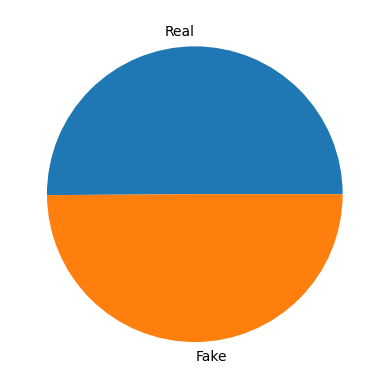

In [60]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Real', 'Fake'])
plt.show()

### Handle imbalanced dataset


In [61]:
!pip install imbalanced-learn

In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(4008, 116) (4008,)


In [63]:
y_train_smote.value_counts()


label
0    2004
1    2004
Name: count, dtype: int64

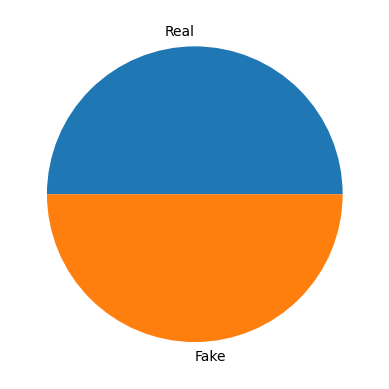

In [64]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Real', 'Fake'])
plt.show()

In [65]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(4008, 116), dtype=float32)

In [66]:
y_train_smote


0       0
1       1
2       1
3       0
4       1
       ..
4003    1
4004    1
4005    1
4006    1
4007    1
Name: label, Length: 4008, dtype: int64

In [67]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 116), dtype=float32)

In [68]:
y_test

2165    1
2587    1
79      0
4121    0
2680    0
       ..
4615    0
4733    1
940     1
2144    1
1045    1
Name: label, Length: 1000, dtype: int64

## Model Training and Evaluation


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression


In [71]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Naive Bayes


In [72]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Decision Tree


In [73]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Random Forest


In [74]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


### Support Vector Machine


In [75]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0


In [76]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)